In [2]:
import numpy as np
from math import pi
from numpy import cos, sin, rad2deg
from skimage import io
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import sobel, sobel_h, sobel_v
from skimage.feature import canny,corner_harris, corner_peaks
from skimage.transform import hough_line, hough_line_peaks
# from matplotlib.pyplot import figure, imshow, title, subplot, plot, show, plot, xlabel, ylabel, axis
from matplotlib.pyplot import figure, imshow, title, subplot, plot, show, plot, xlabel, ylabel, axis, colorbar, clim,Circle




import time


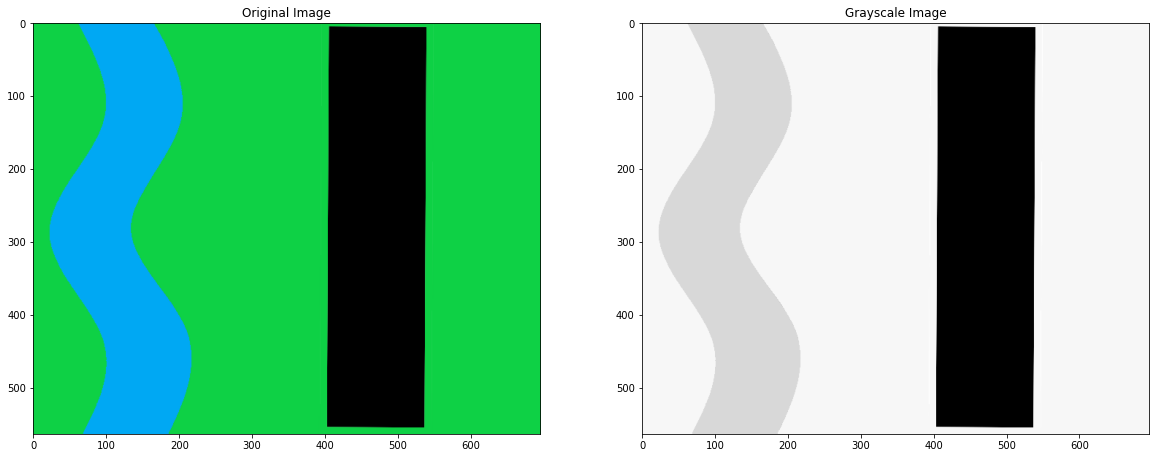

In [41]:
img = imread("im.png")
# img = imread("proj5.png")
figure(figsize=(20,20))
subplot(1,2,1)
imshow(img)
title("Original Image")
if(len(img.shape) == 3):
    img = rgb2gray(img)

subplot(1,2,2)
imshow(img, cmap="gray")
title("Grayscale Image")
show()

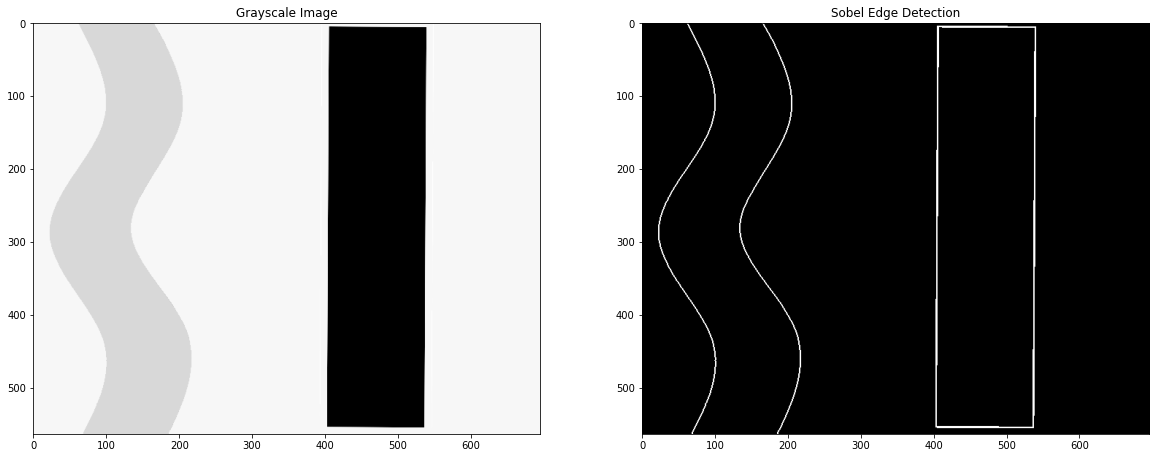

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [42]:
def binImg(img):
    img2 = np.copy(img)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] > 0.03:
                img2[i,j] = 1
            else:
                img2[i,j] = 0
    return img2

imgSobel = sobel(img)
imgSobel = binImg(imgSobel)
figure(figsize=(20,20))
subplot(1,2,1)
imshow(img, cmap="gray")
title("Grayscale Image")
subplot(1,2,2)
imshow(imgSobel, cmap="gray")
title("Sobel Edge Detection")
show()
print(imgSobel)

## hough_line Function
Perform a straight line Hough transform.

Parameters
image : (M, N) ndarray
    Input image with nonzero values representing edges.
theta : 1D ndarray of double, optional
    Angles at which to compute the transform, in radians. Defaults to a vector of 180 angles evenly spaced in the range [-pi/2, pi/2).

Returns
hspace : 2-D ndarray of uint64
    Hough transform accumulator.
angles : ndarray
    Angles at which the transform is computed, in radians.
distances : ndarray
    Distance values.

Notes
The origin is the top left corner of the original image. X and Y axis are horizontal and vertical edges respectively. The distance is the minimal algebraic distance from the origin to the detected line. The angle accuracy can be improved by decreasing the step size in the theta array.

## hough_line_peaks
Return peaks in a straight line Hough transform.

Identifies most prominent lines separated by a certain angle and distance in a Hough transform. Non-maximum suppression with different sizes is applied separately in the first (distances) and second (angles) dimension of the Hough space to identify peaks.

Parameters
hspace : (N, M) array
    Hough space returned by the hough_line function.
angles : (M,) array
    Angles returned by the hough_line function. Assumed to be continuous. (angles[-1] - angles[0] == PI).
dists : (N, ) array
    Distances returned by the hough_line function.
min_distance : int, optional
    Minimum distance separating lines (maximum filter size for first dimension of hough space).
min_angle : int, optional
    Minimum angle separating lines (maximum filter size for second dimension of hough space).
threshold : float, optional
    Minimum intensity of peaks. Default is 0.5 * max(hspace).
num_peaks : int, optional
    Maximum number of peaks. When the number of peaks exceeds num_peaks, return num_peaks coordinates based on peak intensity.

Returns
accum, angles, dists : tuple of array
    Peak values in Hough space, angles and distances.

[209 207 135 134 112] [ 0.          0.         -1.57079633 -1.57079633 -1.55334303] [ 405.  536. -556.   -8. -544.]


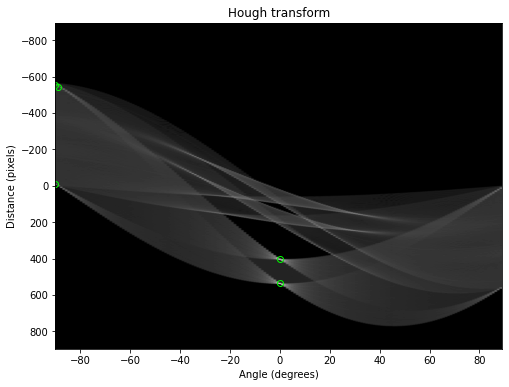

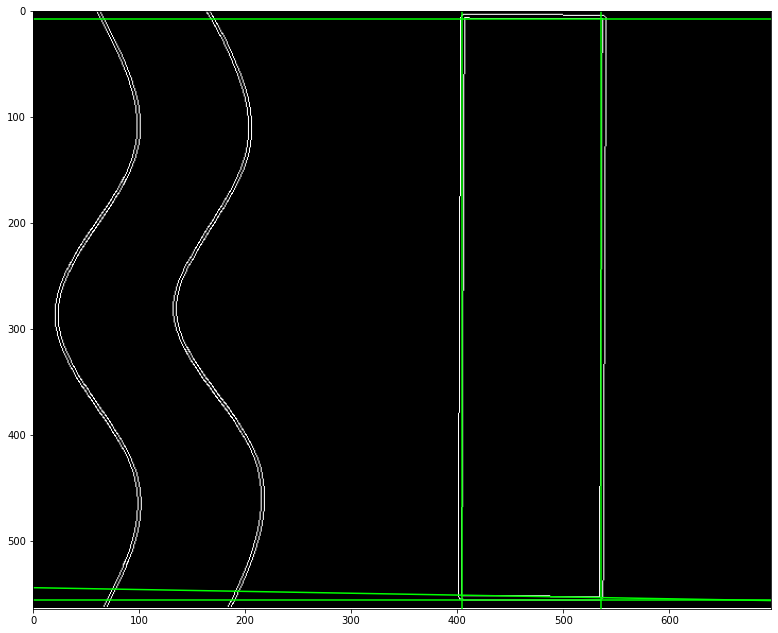

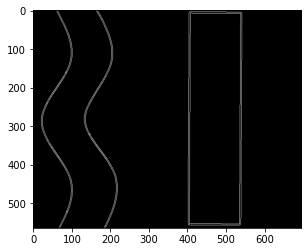

In [43]:
imgCanny = canny(imgSobel, sigma=1.0, low_threshold=0.1, high_threshold=0.5, mode = "nearest")

accumulator, angle, dist  = hough_line(imgCanny)

peaks, angles, dists = hough_line_peaks(accumulator, angle, dist, threshold=.5*accumulator.max(), num_peaks=15)

print(peaks, angles, dists)
axes = (rad2deg(angle[0]), rad2deg(angle[-1]), dist[-1], dist[0])

figure(figsize=(8,6))
imshow(accumulator**.5, cmap="gray", extent=axes, aspect="auto")
xlabel('Angle (degrees)')
ylabel('Distance (pixels)')
title("Hough transform")
plot(rad2deg(angles), dists, marker='o', markeredgecolor='lime', markerfacecolor="none", linestyle="none")
show()

M, N = img.shape

figure(figsize=(14,11))
imshow(imgCanny, cmap="gray")

for _, angle, dist in zip(peaks, angles, dists):
    
    x0 = 0
    y0 = dist / (sin(angle)+0.0000000000001)
    x1 = N
    y1 = (dist - x1*cos(angle)) / (sin(angle)+0.0000000000001)
    
    plot((x0, x1), (y0, y1), color='lime')

axis((0,N,M,0))
show()
imshow(imgCanny, cmap="gray")


## Compute Harris corner measure response image.

This corner detector uses information from the auto-correlation matrix A:

    A = [(imx**2)   (imx*imy)] = [Axx Axy]
        [(imx*imy)   (imy**2)]   [Axy Ayy]
Where imx and imy are first derivatives, averaged with a gaussian filter. The corner measure is then defined as:

    det(A) - k * trace(A)**2
or:

    2 * det(A) / (trace(A) + eps)
Parameters
image : (M, N) ndarray
    Input image.
method : {'k', 'eps'}, optional
    Method to compute the response image from the auto-correlation matrix.
k : float, optional
    Sensitivity factor to separate corners from edges, typically in range [0, 0.2]. Small values of k result in detection of sharp corners.
eps : float, optional
    Normalisation factor (Noble's corner measure).
sigma : float, optional
    Standard deviation used for the Gaussian kernel, which is used as weighting function for the auto-correlation matrix.

Returns
response : ndarray
    Harris response image.

[array([[552, 533],
       [  9, 536],
       [551, 405],
       [  8, 408],
       [  1, 166],
       [  1, 163],
       [190,  66],
       [191,  69],
       [193,  64],
       [194,  67],
       [196,  62],
       [197,  65],
       [203,  61],
       [200,  63],
       [188,  71],
       [371,  61],
       [372,  58],
       [375,  60],
       [384,  70],
       [199,  60],
       [335, 152],
       [334, 155],
       [185,  73],
       [368,  59],
       [344, 158],
       [187,  68],
       [341, 156],
       [388,  69],
       [340, 159],
       [387,  72],
       [212,  51],
       [338, 154],
       [337, 157],
       [184,  70],
       [385,  67],
       [202,  58],
       [343, 161],
       [374,  63],
       [369,  56],
       [213,  54],
       [181,  72],
       [331, 153],
       [391,  71],
       [204, 169],
       [216,  52],
       [200, 168],
       [332, 150],
       [215,  49],
       [182,  75],
       [203, 166],
       [390,  74],
       [201, 171],
       [348

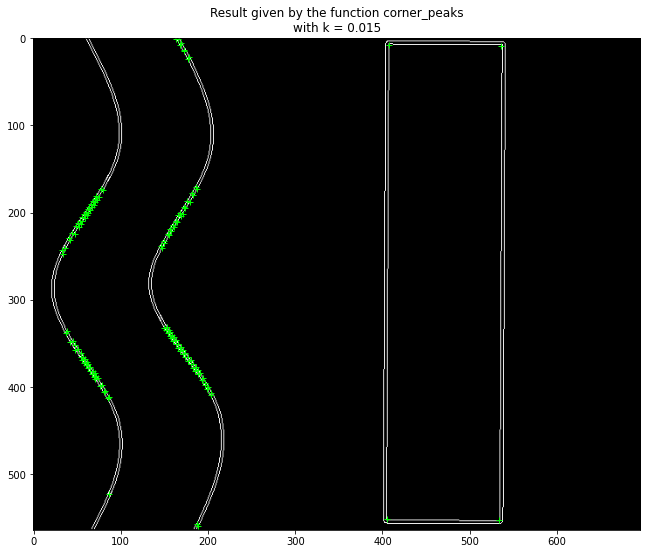

In [44]:
ks = [.015]
# img = temp
# img = img[2:img.shape[0]-2][2:img.shape[1]-2]
corners = []
figure(figsize=(37,25))
for i, k in enumerate(ks):
    
    y = corner_harris(imgCanny, method='k', k=k, sigma=1)
    coords = corner_peaks(y, threshold_rel=.3, min_distance=1)
    # k = 0
    corners.append(coords)

    subplot(1,3,i+1)
    imshow(imgCanny, cmap="gray")
    plot(coords[:,1], coords[:,0], color='lime', marker='+', linestyle='none')
    title(f"Result given by the function corner_peaks\nwith k = {k}")

print(corners)

In [45]:
def floodfill(img, x, y, val):
    if x>=0 and x<img.shape[0] and y>=0 and y<img.shape[1] and img[x,y] == 1:
        img[x,y] = 0
        # print("for")
        floodfill(img, x+1, y-1, val)
        floodfill(img, x+1, y, val)
        floodfill(img, x+1, y+1, val)
        # x = x
        floodfill(img, x, y-1, val)        
        floodfill(img, x, y+1, val)
        floodfill(img, x-1, y-1, val)
        floodfill(img, x-1, y, val)
        floodfill(img, x-1, y+1, val)
    return img


In [46]:
print(corners[0].shape)
img2 = imgSobel.copy()
# figure(figsize=(14,11))
for i in range(corners[0].shape[0]):
        # print(corners[0][i][0], corners[0][i][1])
        for x in range(corners[0][i][1]-3, corners[0][i][1]+3):
                for y in range(corners[0][i][0]-3, corners[0][i][0]+3):
                        if(x>=0 and x<imgSobel.shape[1] and y>=0 and y<imgSobel.shape[0]):
                                img2 = floodfill(img2,y,x,0)
                                # img2[y][x] = 1
        print(corners[0][i][1],corners[0][i][0])
        figure(figsize=(14,11))
        imshow(img2, cmap="gray")
        plot(corners[0][i][1],corners[0][i][0], color='red', marker='+', linestyle='none')
                        

# for i in range (len(corners)):
#     if(corners[i][0] >= x0 and corners[i][0] <= x1 and corners[i][1] >= y0 and corners[i][1] <= y1):



# for _, angle, dist in zip(peaks, angles, dists):
    
#     x0 = 0
#     y0 = dist / (sin(angle)+0.0000000000001)
#     x1 = N
#     y1 = (dist - x1*cos(angle)) / (sin(angle)+0.0000000000001)

axis((0,N,M,0))
show()
imshow(img2, cmap="gray")

: 

: 

0


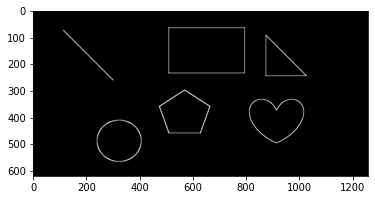

In [ ]:
img2 = imgSobel.copy()
img2 = img2.astype(np.uint8)
# for i in range(img2.shape[0]):
#     for j in range(img2.shape[1]):
#         if img2[i,j] > 0.12:
#             img2[i,j] = 1
#             print(i,j,end=" ")
#         else:
#             img2[i,j] = 0
#     print()
# print(imgSobel[0].shape)
img2 = floodfill(img2, 5, 406, 0)
print(img2[5][406])
imshow(img2, cmap="gray")


In [ ]:
imgSobel

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])